In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic Regression

In [4]:
log_regr_df = pd.read_csv('logistic_regression.csv', header=[0,1], index_col=[0,1]).unstack(level=[0,1]).reset_index()
log_regr_df.columns = ['features', 'pose', 'f1_score', 'emotion', 'value']
log_regr_df.head()

,features,pose,f1_score,emotion,value
0,delaunay,tilted,macro_avg,anger,0.51
1,delaunay,tilted,macro_avg,disgust,0.44
2,delaunay,tilted,macro_avg,fear,0.41
3,delaunay,tilted,macro_avg,happiness,0.57
4,delaunay,tilted,macro_avg,sadness,0.45


## Confronto dell'_f1-score_ rispetto alla _pose_ per ogni feature sulle diverse emozioni

### Weighted_avg

Qui vengono evidenziate le differenze prestazionali tra i diversi valori della _pose_

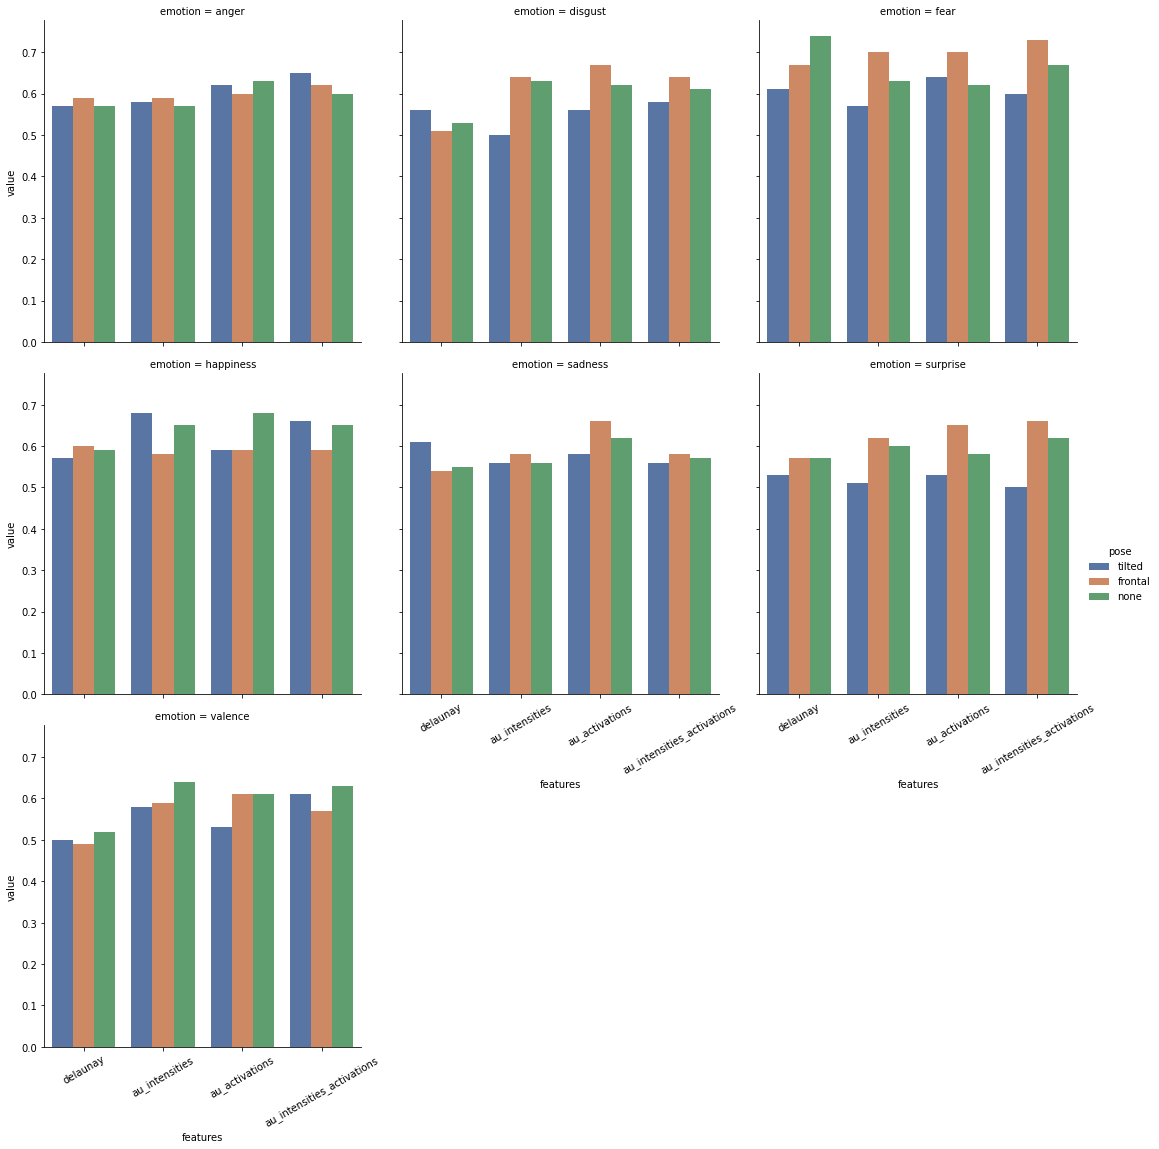

In [5]:
fg = sns.catplot(x='features', y='value', hue='pose', col='emotion', data=(log_regr_df[log_regr_df.f1_score=='weighted_avg']), kind='bar', palette='deep', col_wrap=3)
fg.set_xticklabels(rotation=30)
plt.show()

### Macro_avg

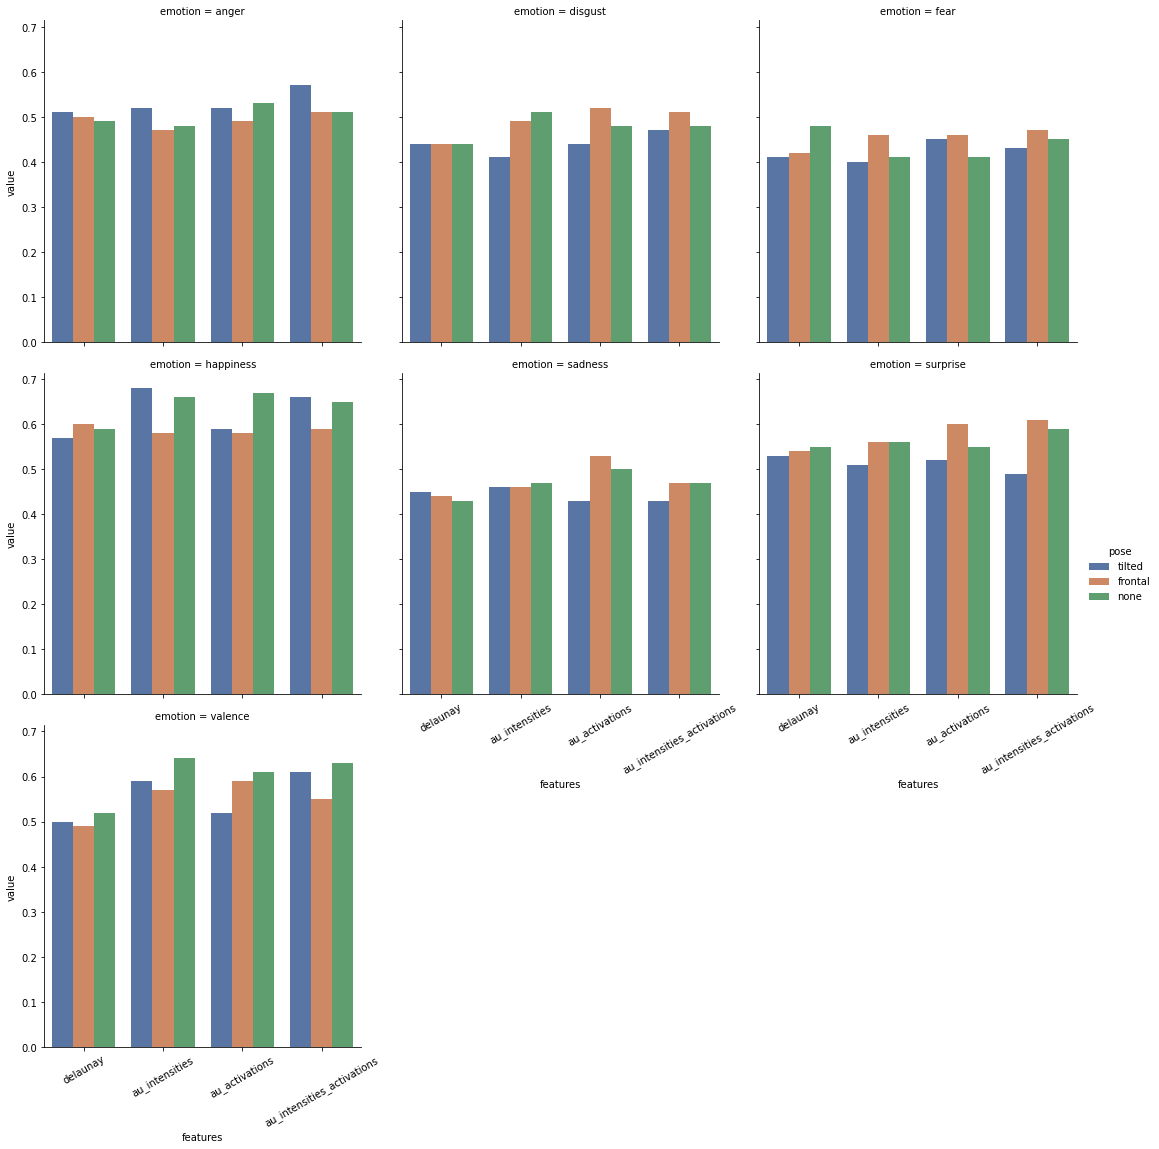

In [6]:
fg = sns.catplot(x='features', y='value', hue='pose', col='emotion', data=(log_regr_df[log_regr_df.f1_score=='macro_avg']), kind='bar', palette='deep', col_wrap=3)
fg.set_xticklabels(rotation=30)
plt.show()

## Performance del modello rispetto alle feature per ogni emozione

### Weighted_avg

Qui si evidenzia, per ogni valore della _pose_, l'andamento del punteggio rispetto alle differenti _features_ utilizzate

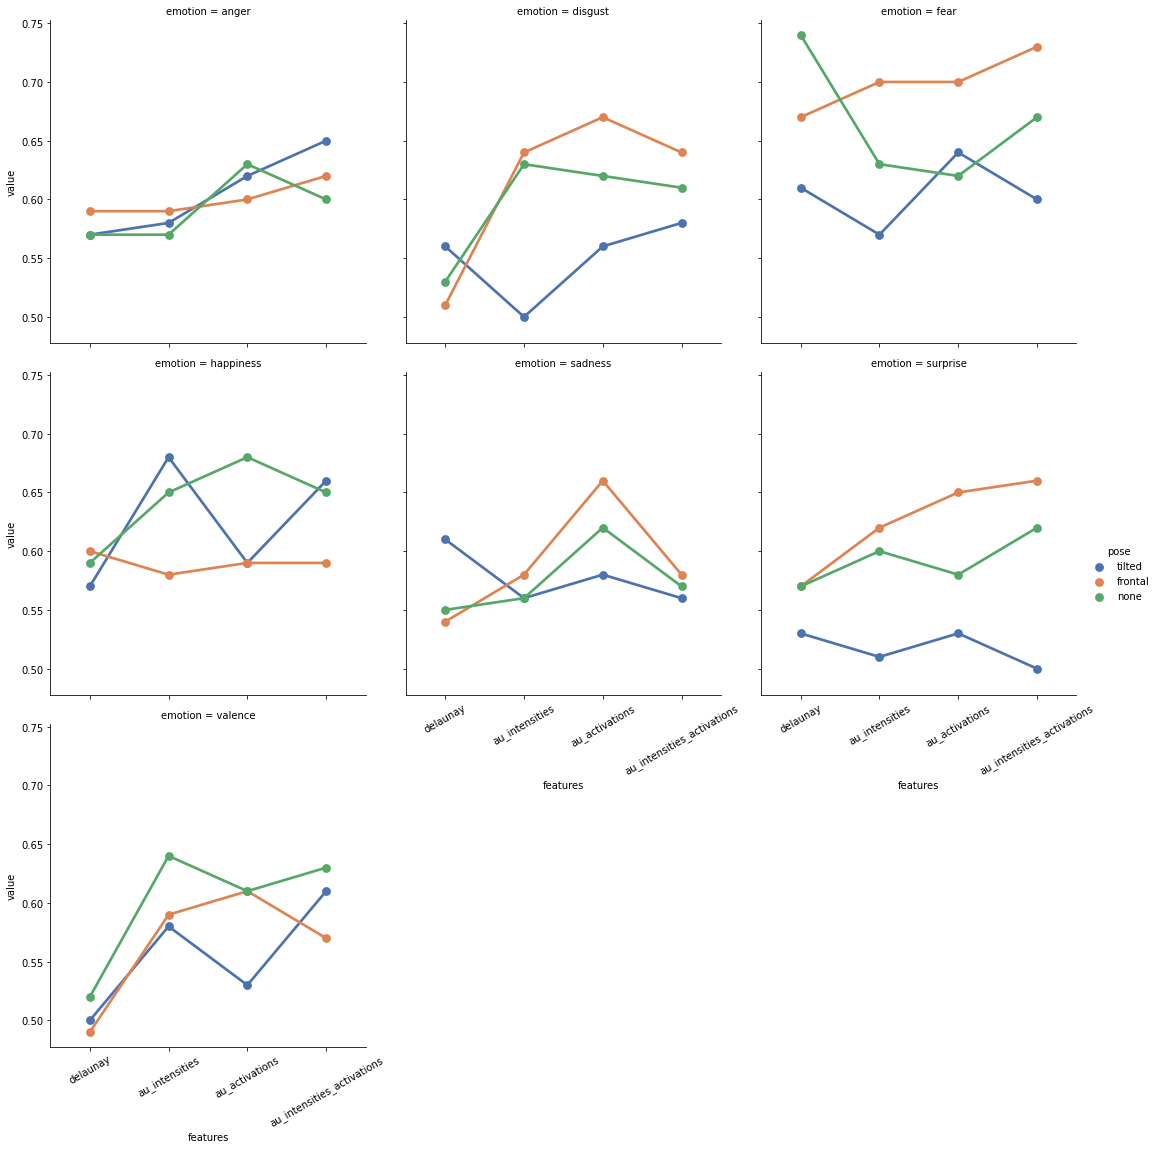

In [8]:
fg = sns.catplot(x='features', y='value', hue='pose', col='emotion', data=(log_regr_df[log_regr_df.f1_score=='weighted_avg']), kind='point', palette='deep', col_wrap=3)
fg.set_xticklabels(rotation=30)
plt.show()

### Macro_avg

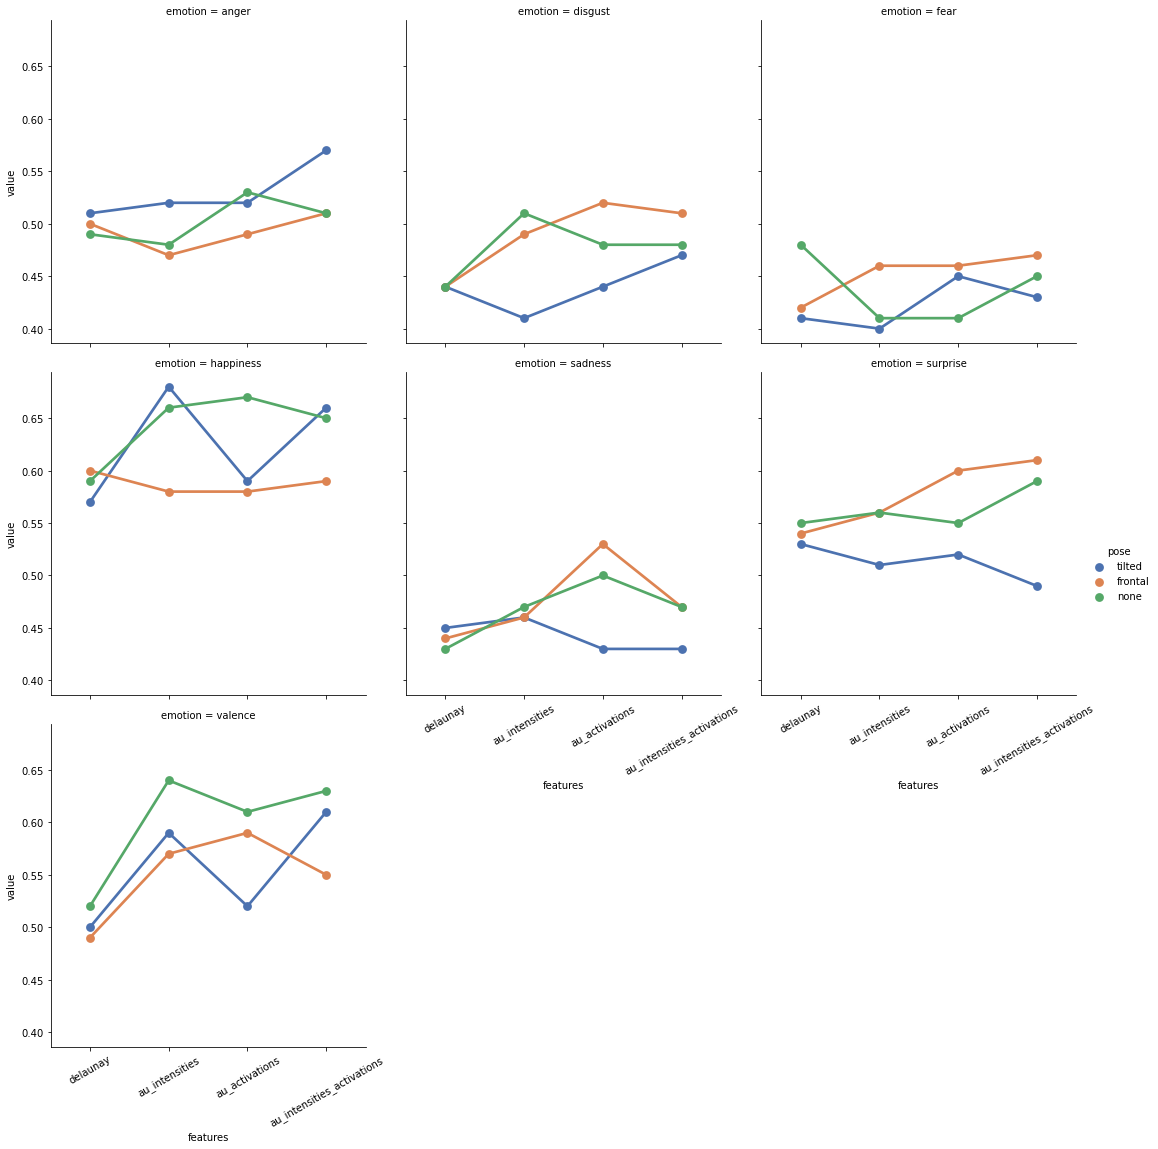

In [ ]:
fg = sns.catplot(x='features', y='value', hue='pose', col='emotion', data=(log_regr_df[log_regr_df.f1_score=='macro_avg']), kind='point', palette='deep', col_wrap=3)
fg.set_xticklabels(rotation=30)
plt.show()

# Linear SVM

In [ ]:
linear_svm_df = pd.read_csv('linear_SVM.csv', header=[0,1], index_col=[0,1]).unstack(level=[0,1]).reset_index()
linear_svm_df.columns = ['features', 'pose', 'f1_score', 'emotion', 'value']
linear_svm_df.head()

,features,pose,f1_score,emotion,value
0,delaunay,tilted,macro_avg,anger,0.48
1,delaunay,tilted,macro_avg,disgust,0.45
2,delaunay,tilted,macro_avg,fear,0.33
3,delaunay,tilted,macro_avg,happiness,0.59
4,delaunay,tilted,macro_avg,sadness,0.42


## Confronto dell'_f1-score_ rispetto alla _pose_ per ogni feature sulle diverse emozioni

### Weighted_avg

Qui vengono evidenziate le differenze prestazionali tra i diversi valori della _pose_

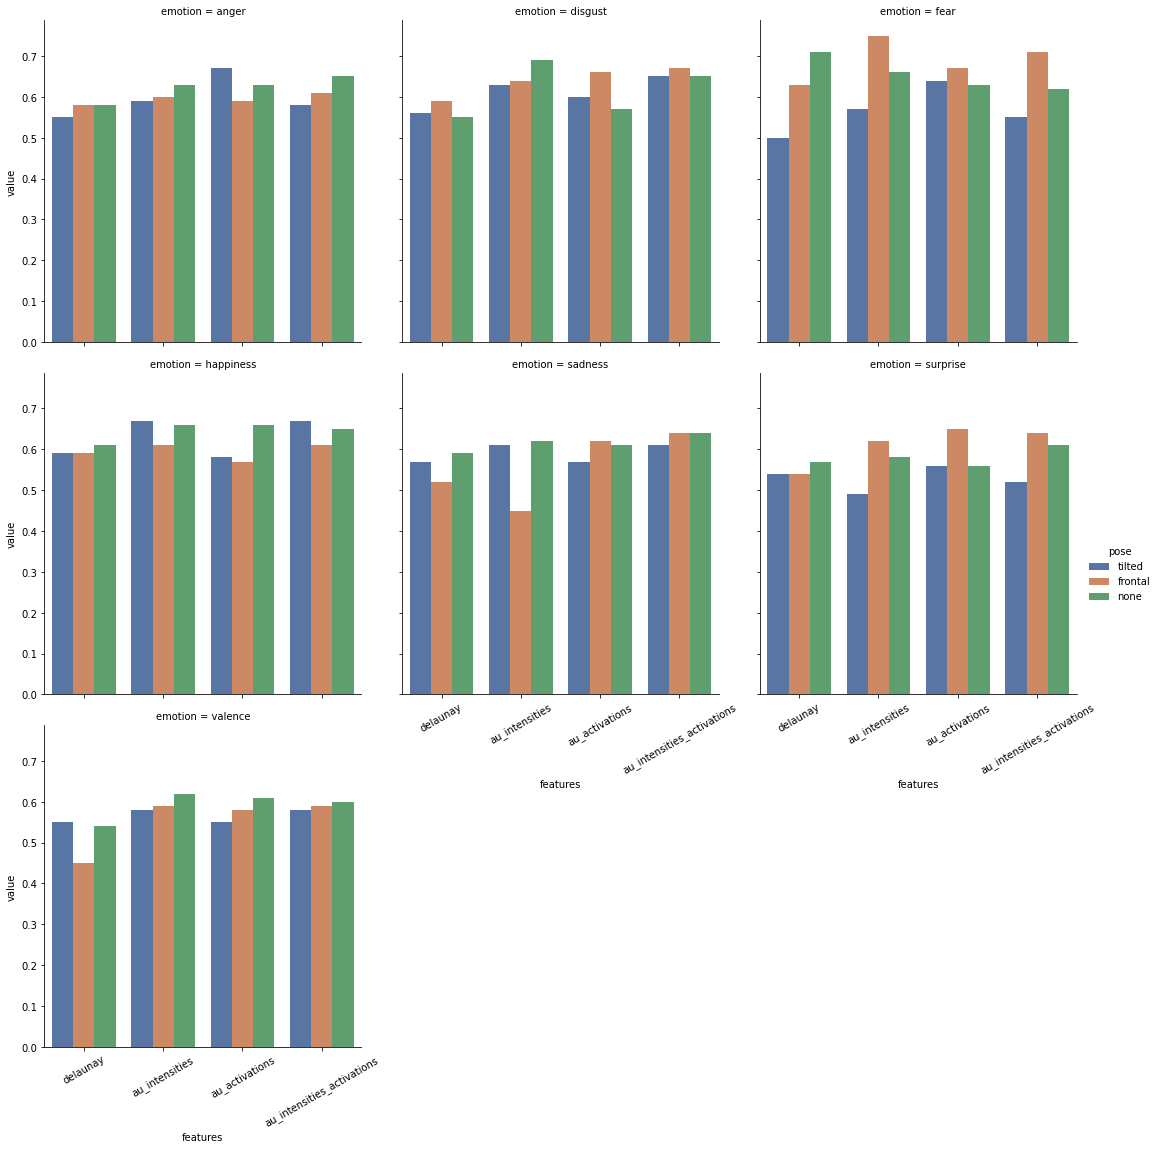

In [ ]:
fg = sns.catplot(x='features', y='value', hue='pose', col='emotion', data=(linear_svm_df[linear_svm_df.f1_score=='weighted_avg']), kind='bar', palette='deep', col_wrap=3)
fg.set_xticklabels(rotation=30)
plt.show()

### Macro_avg

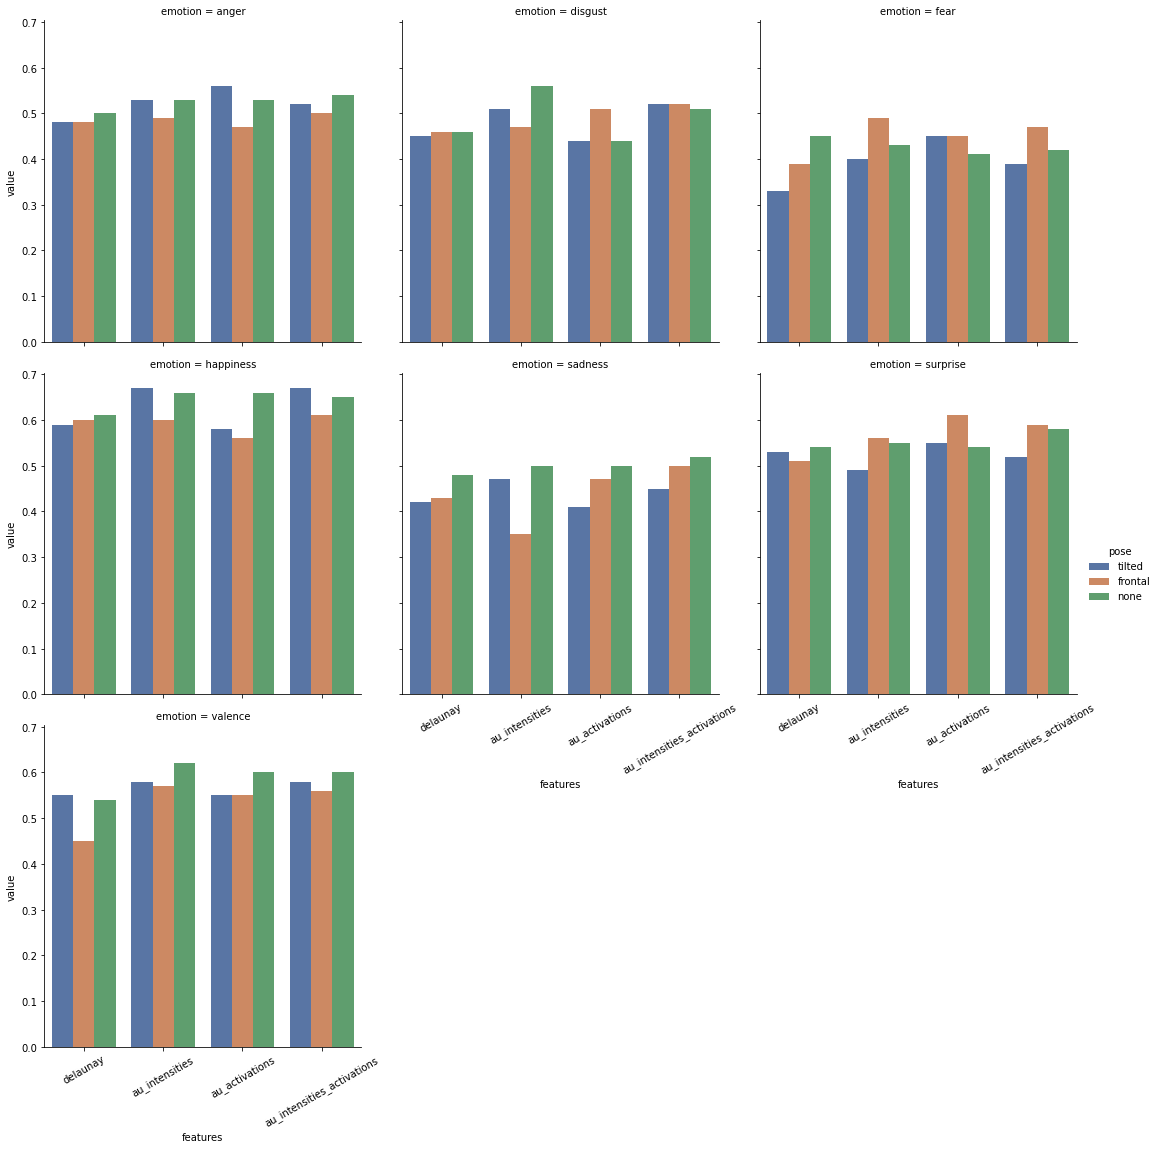

In [ ]:
fg = sns.catplot(x='features', y='value', hue='pose', col='emotion', data=(linear_svm_df[linear_svm_df.f1_score=='macro_avg']), kind='bar', palette='deep', col_wrap=3)
fg.set_xticklabels(rotation=30)
plt.show()

## Performance del modello rispetto alle feature per ogni emozione

### Weighted_avg

Qui si evidenzia, per ogni valore della _pose_, l'andamento del punteggio rispetto alle differenti _features_ utilizzate

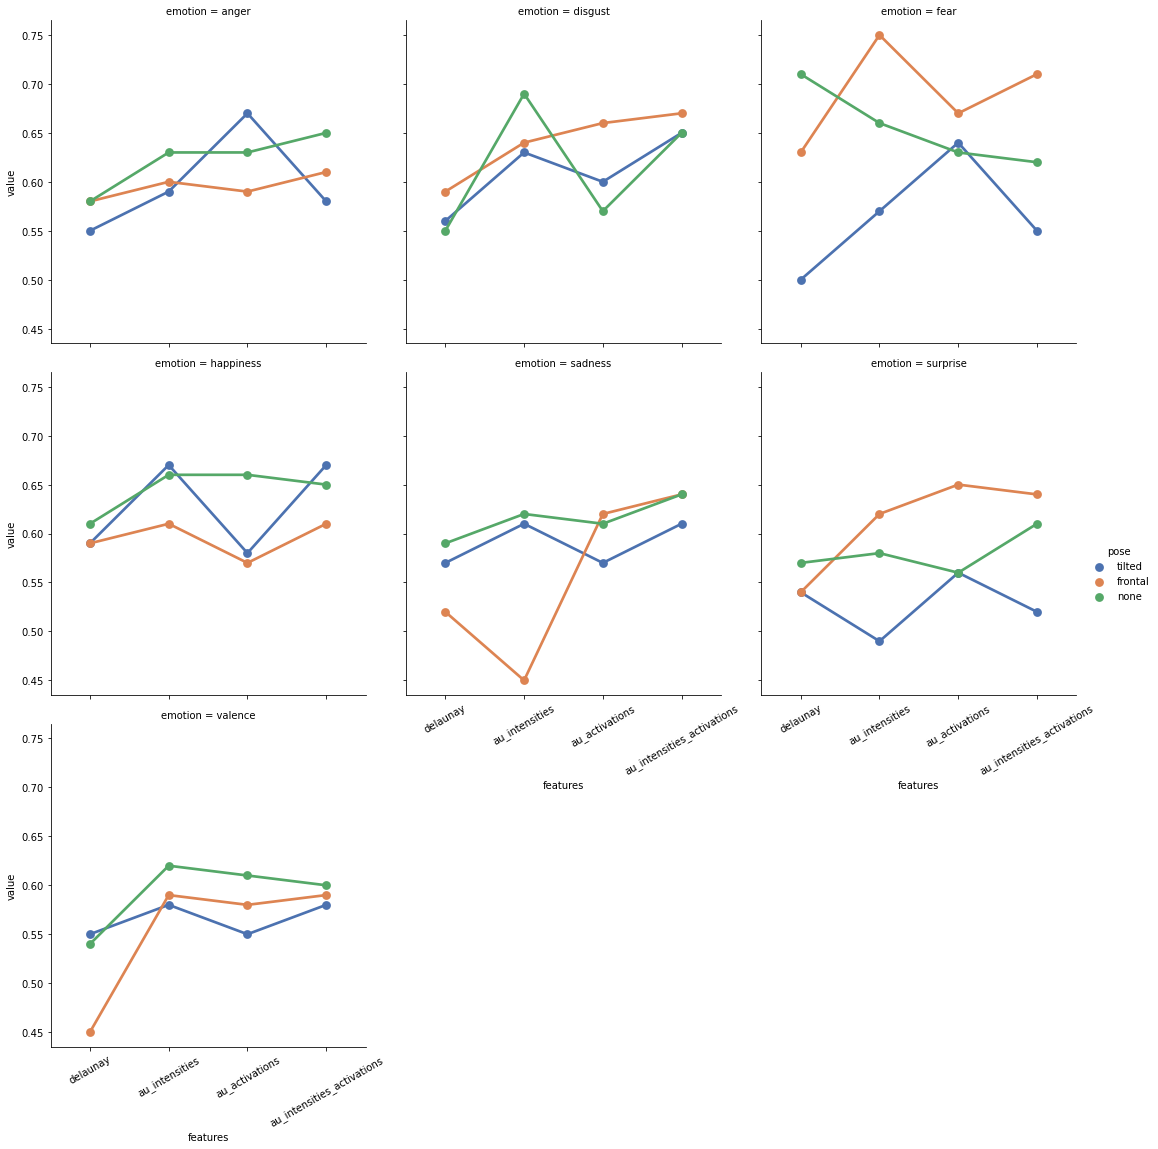

In [ ]:
fg = sns.catplot(x='features', y='value', hue='pose', col='emotion', data=(linear_svm_df[linear_svm_df.f1_score=='weighted_avg']), kind='point', palette='deep', col_wrap=3)
fg.set_xticklabels(rotation=30)
plt.show()

### Macro_avg

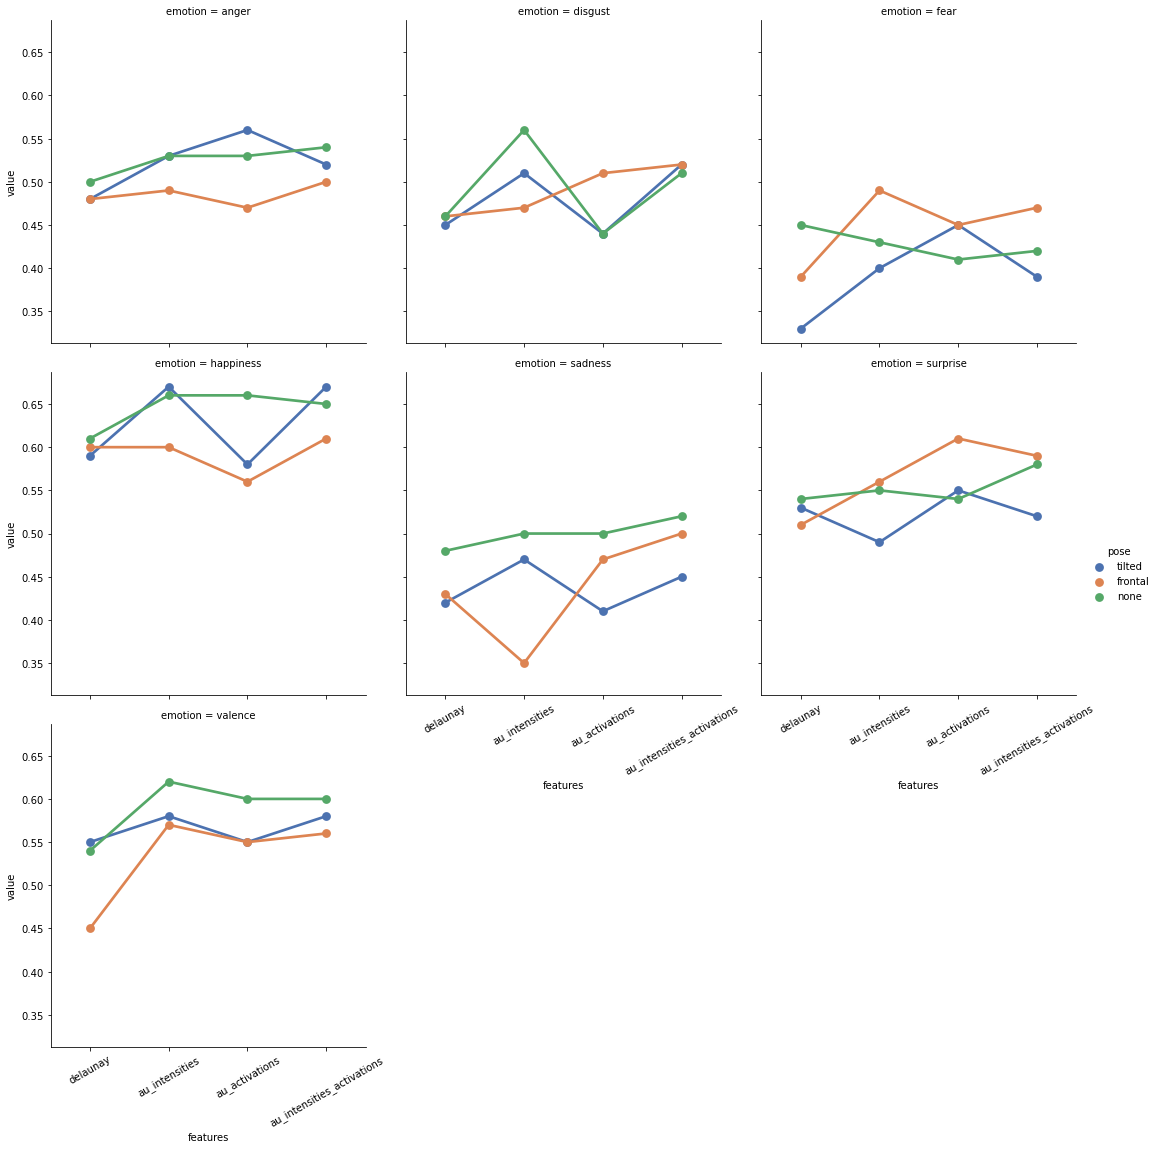

In [ ]:
fg = sns.catplot(x='features', y='value', hue='pose', col='emotion', data=(linear_svm_df[linear_svm_df.f1_score=='macro_avg']), kind='point', palette='deep', col_wrap=3)
fg.set_xticklabels(rotation=30)
plt.show()

# Kernel SVM

In [9]:
kernel_svm_df = pd.read_csv('kernel_SVM.csv', header=[0,1], index_col=[0,1]).unstack(level=[0,1]).reset_index()
kernel_svm_df.columns = ['features', 'pose', 'f1_score', 'emotion', 'value']
kernel_svm_df.head()

,features,pose,f1_score,emotion,value
0,delaunay,tilted,macro_avg,anger,0.52
1,delaunay,tilted,macro_avg,disgust,0.49
2,delaunay,tilted,macro_avg,fear,0.38
3,delaunay,tilted,macro_avg,happiness,0.57
4,delaunay,tilted,macro_avg,sadness,0.47


## Confronto dell'_f1-score_ rispetto alla _pose_ per ogni feature sulle diverse emozioni

### Weighted_avg

Qui vengono evidenziate le differenze prestazionali tra i diversi valori della _pose_

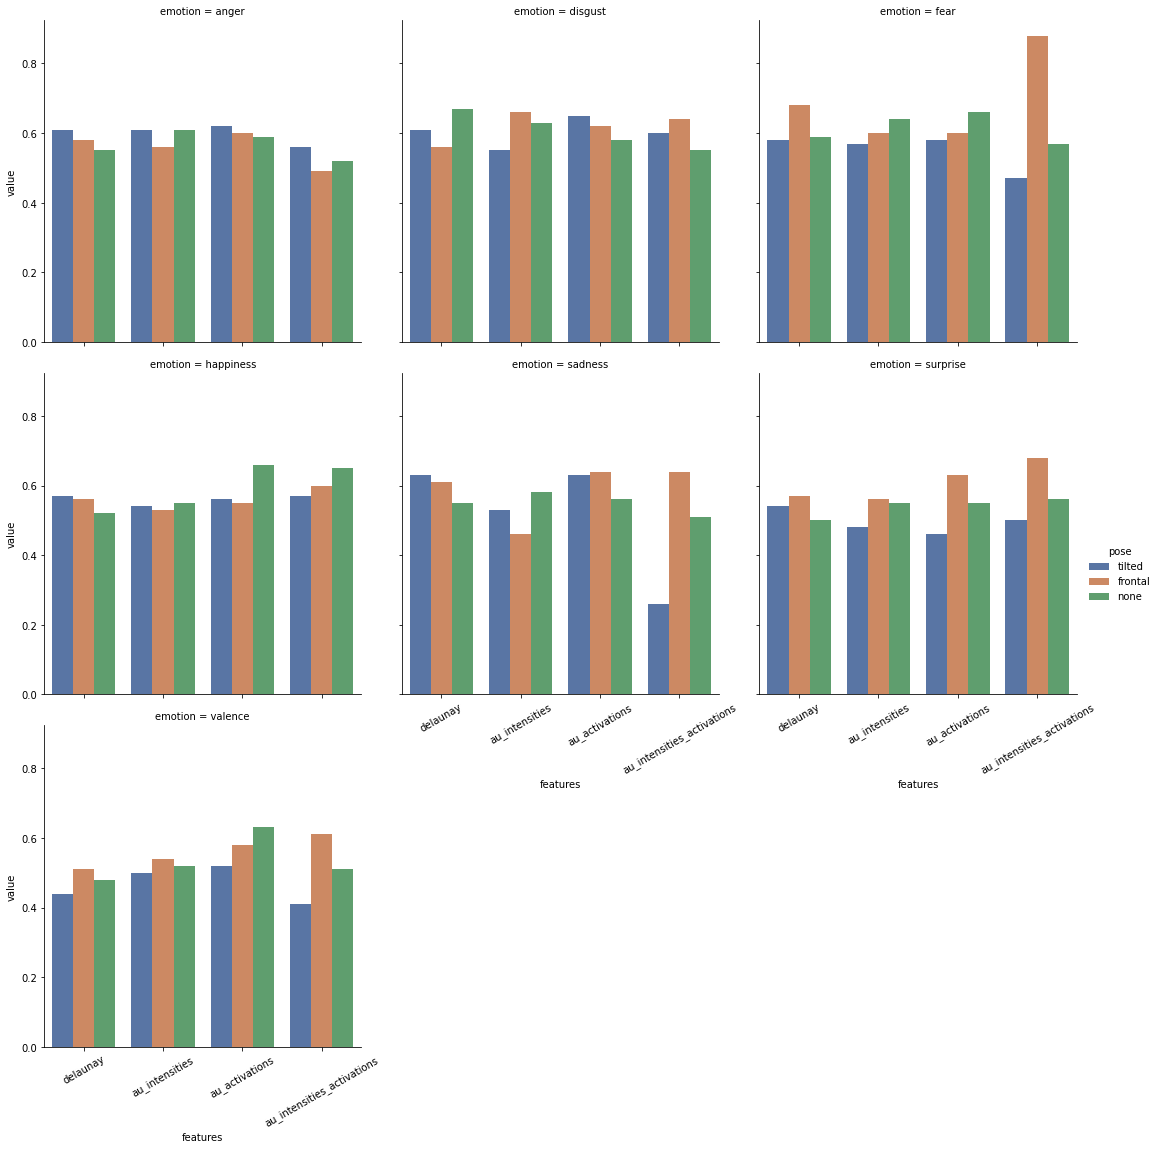

In [10]:
fg = sns.catplot(x='features', y='value', hue='pose', col='emotion', data=(kernel_svm_df[kernel_svm_df.f1_score=='weighted_avg']), kind='bar', palette='deep', col_wrap=3)
fg.set_xticklabels(rotation=30)
plt.show()

### Macro_avg

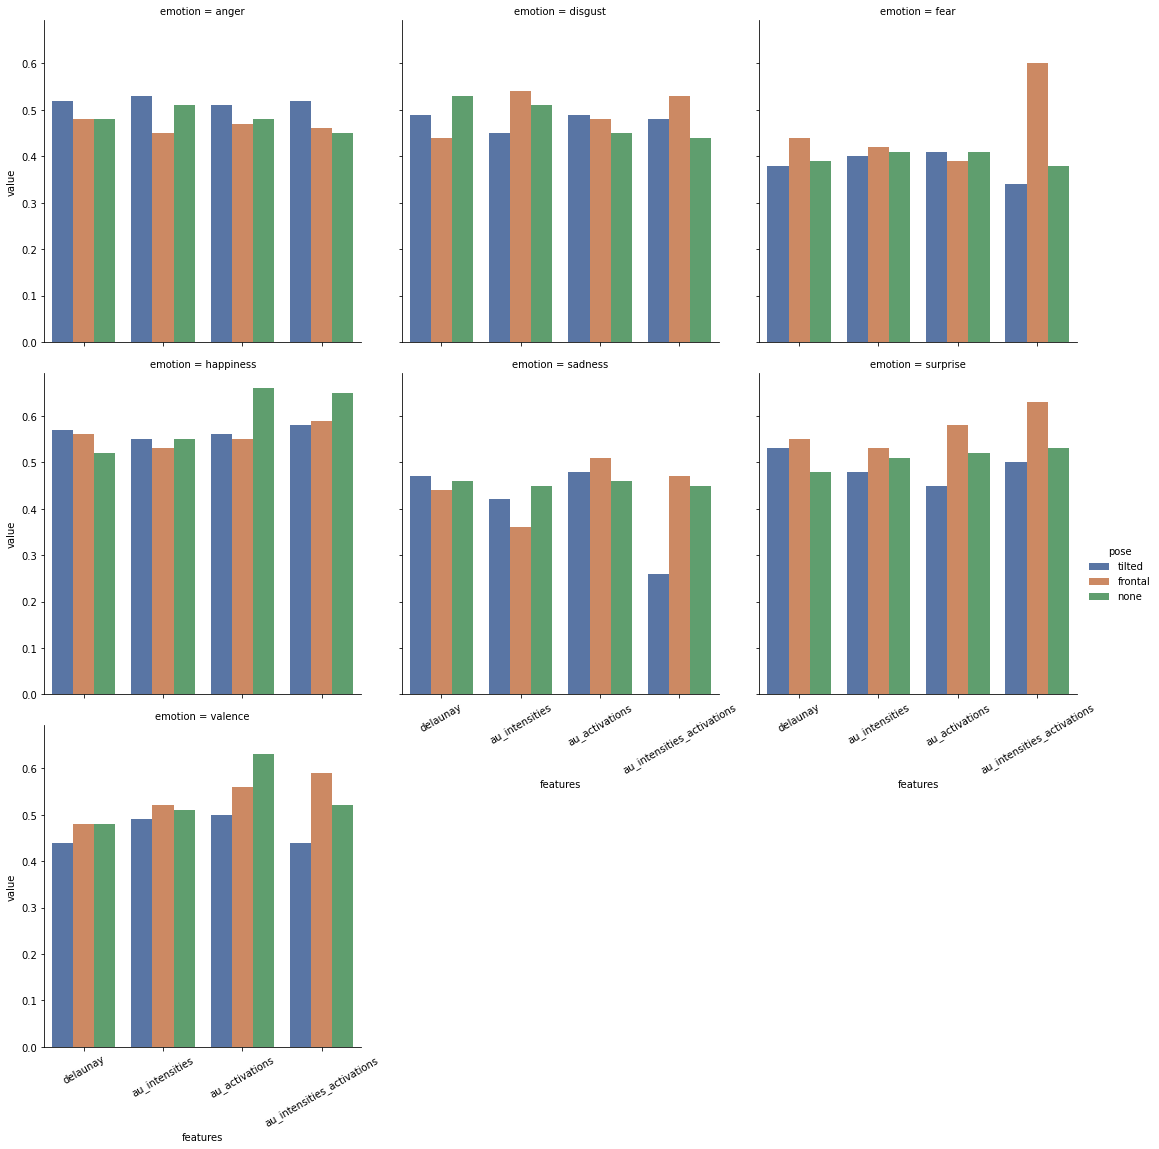

In [11]:
fg = sns.catplot(x='features', y='value', hue='pose', col='emotion', data=(kernel_svm_df[kernel_svm_df.f1_score=='macro_avg']), kind='bar', palette='deep', col_wrap=3)
fg.set_xticklabels(rotation=30)
plt.show()

## Performance del modello rispetto alle feature per ogni emozione

### Weighted_avg

Qui si evidenzia, per ogni valore della _pose_, l'andamento del punteggio rispetto alle differenti _features_ utilizzate

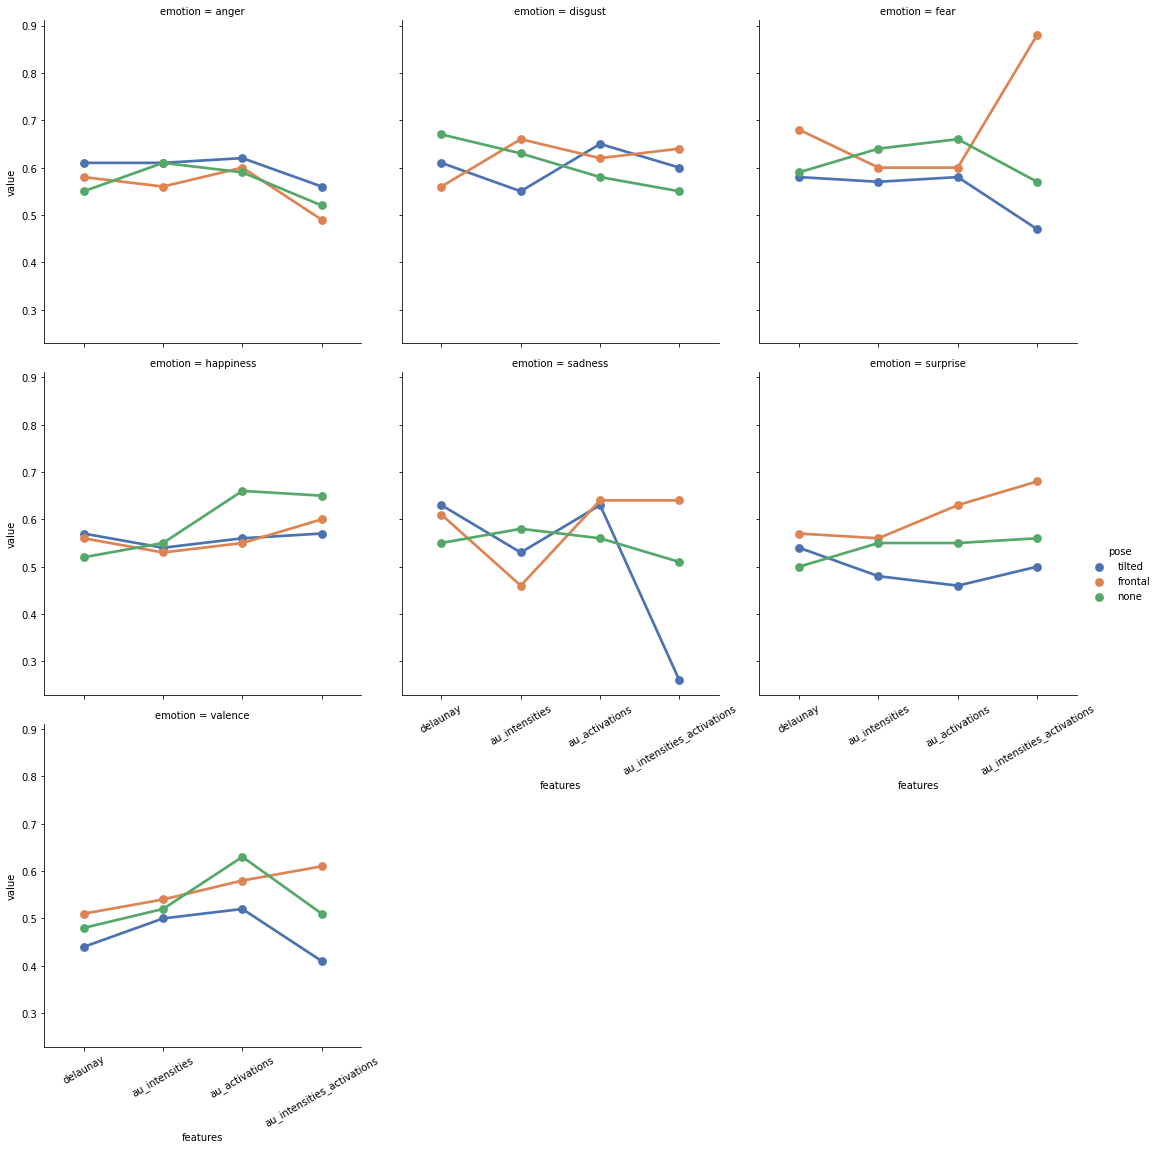

In [12]:
fg = sns.catplot(x='features', y='value', hue='pose', col='emotion', data=(kernel_svm_df[kernel_svm_df.f1_score=='weighted_avg']), kind='point', palette='deep', col_wrap=3)
fg.set_xticklabels(rotation=30)
plt.show()

### Macro_avg

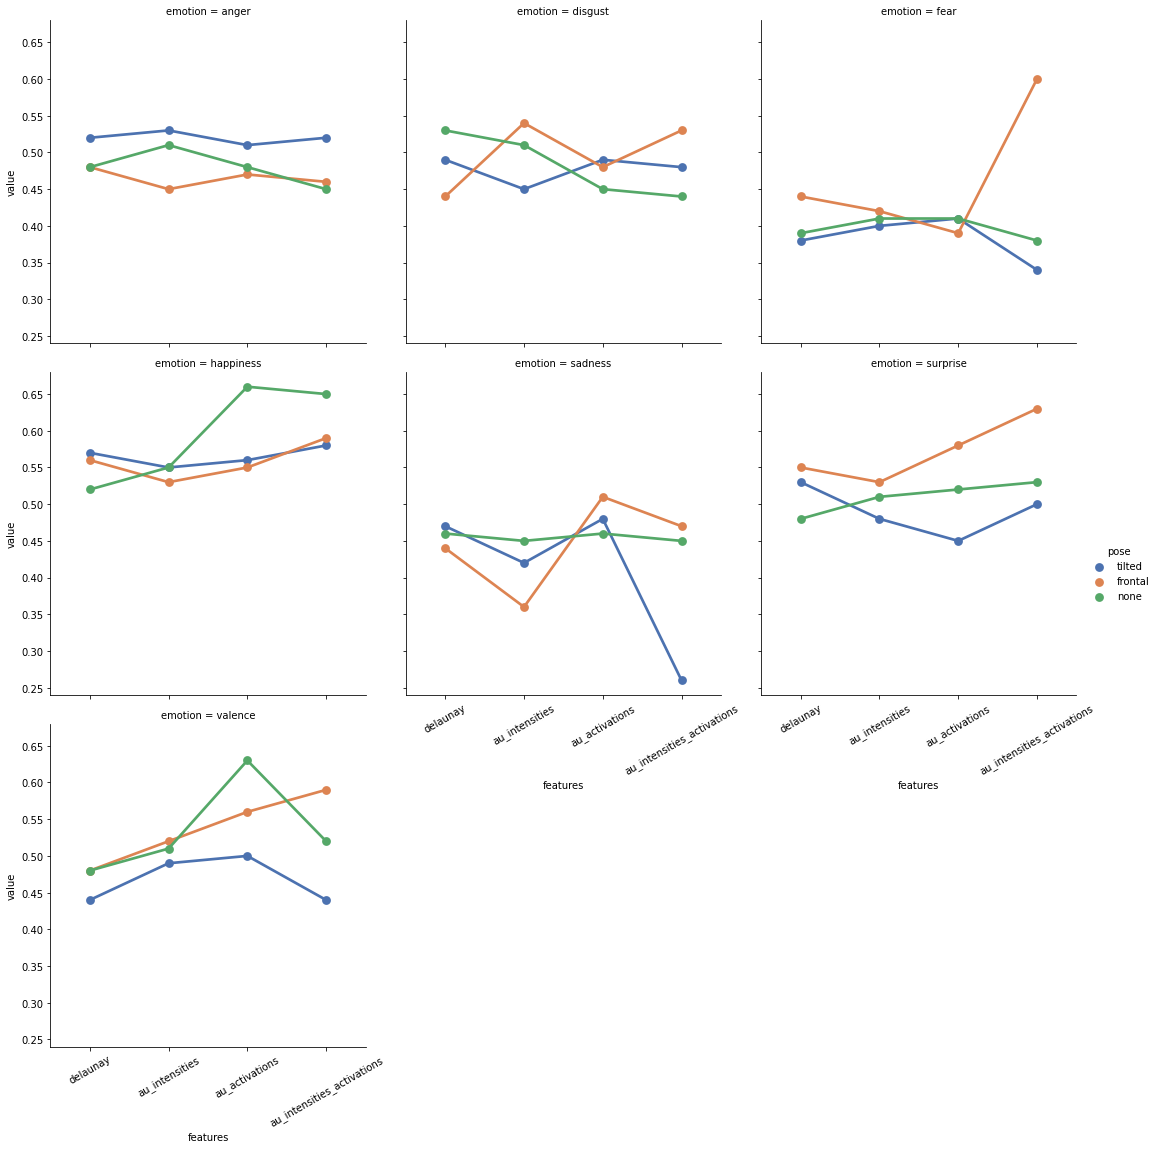

In [13]:
fg = sns.catplot(x='features', y='value', hue='pose', col='emotion', data=(kernel_svm_df[kernel_svm_df.f1_score=='macro_avg']), kind='point', palette='deep', col_wrap=3)
fg.set_xticklabels(rotation=30)
plt.show()

# LSTM

In [16]:
lstm_df = pd.read_csv('LSTM.csv', header=[0], index_col=[0,1], skiprows=[1]).unstack(level=[0,1]).reset_index()
lstm_df.columns = ['features', 'f1_score', 'emotion', 'value']
lstm_df.head()

,features,f1_score,emotion,value
0,au_intensities,macro_avg,anger,0.44
1,au_intensities,macro_avg,disgust,0.41
2,au_intensities,macro_avg,fear,0.52
3,au_intensities,macro_avg,happiness,0.60
4,au_intensities,macro_avg,sadness,0.42


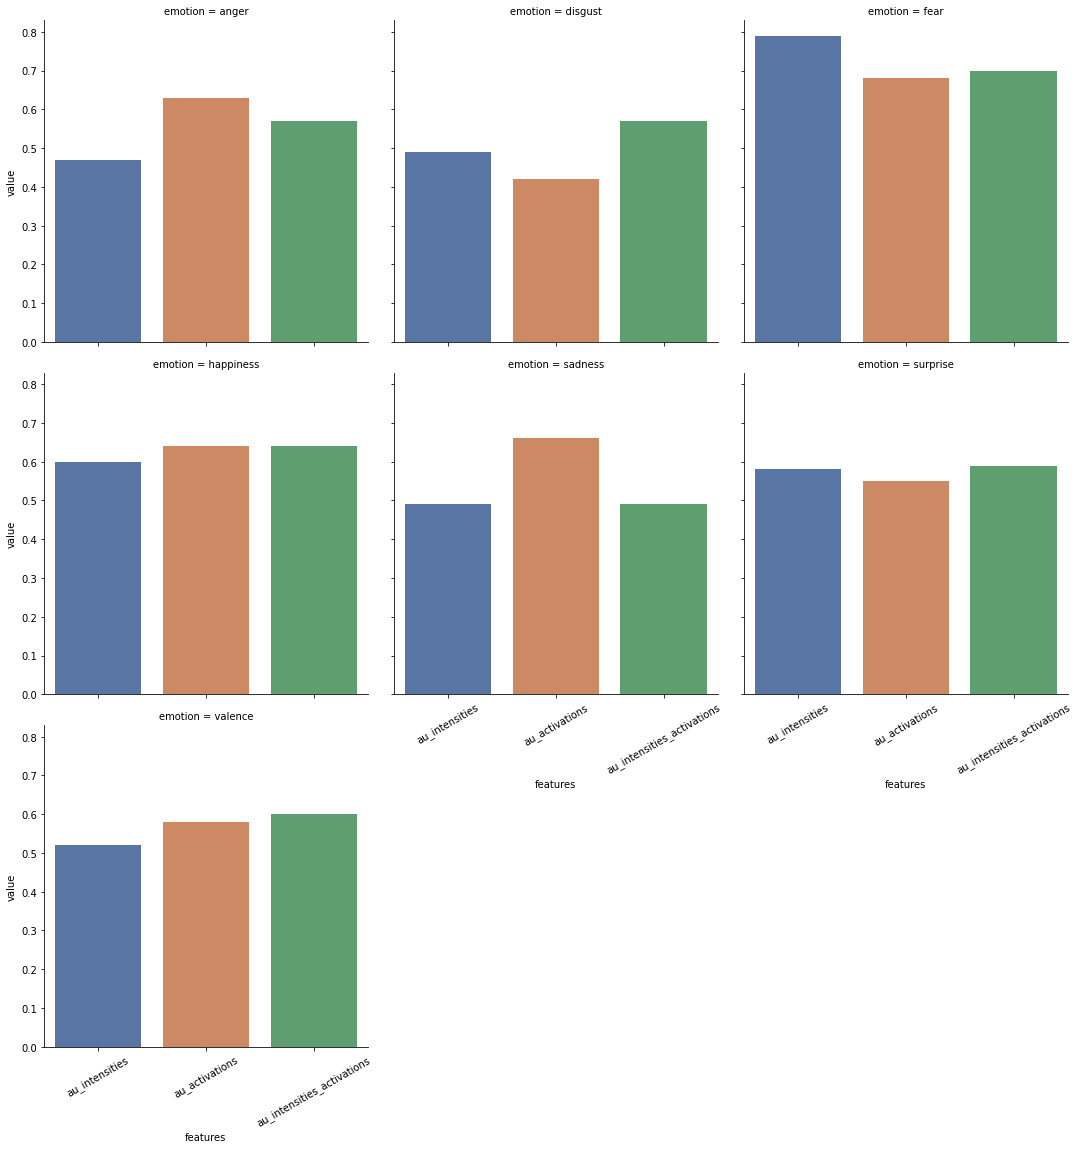

In [17]:
fg = sns.catplot(x='features', y='value', col='emotion', data=(lstm_df[lstm_df.f1_score=='weighted_avg']), kind='bar', palette='deep', col_wrap=3)
fg.set_xticklabels(rotation=30)
plt.show()